In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"../input/loan-prediction-analytics-vidhya/train_ctrUa4K.csv")
df1 = pd.read_csv(r"../input/loan-prediction-analytics-vidhya/test_lAUu6dG.csv")

In [2]:
train_original=df.copy()
test_original=df1.copy()

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

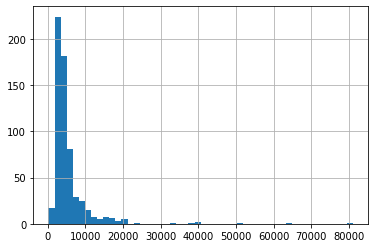

In [5]:
df['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

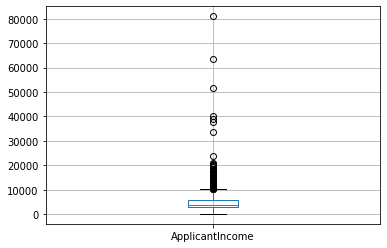

In [6]:
df.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

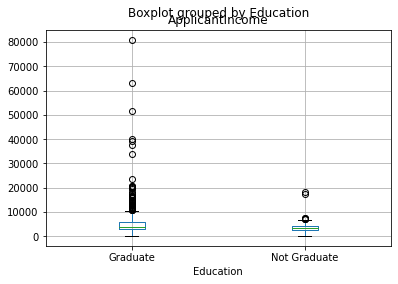

In [7]:
df.boxplot(column='ApplicantIncome', by = 'Education')

<AxesSubplot:>

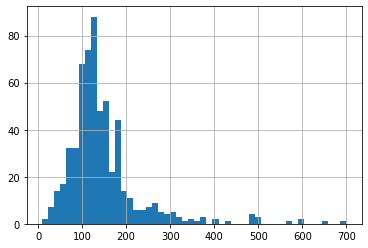

In [8]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

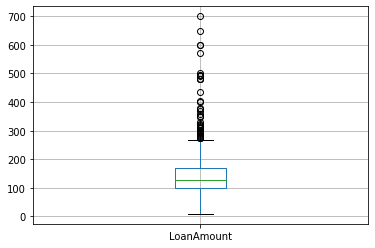

In [9]:
df.boxplot(column='LoanAmount')

In [10]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:' )
print (temp1)
print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

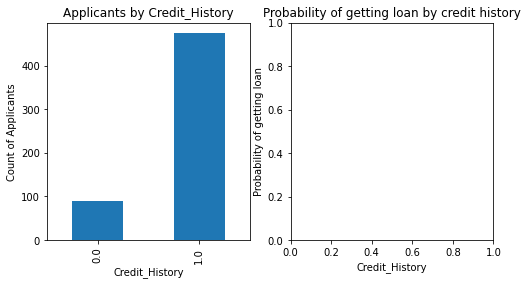

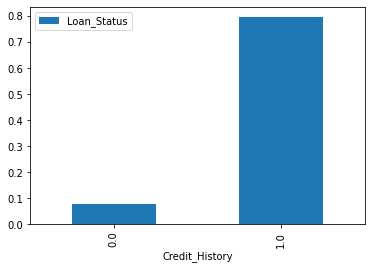

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

<AxesSubplot:xlabel='Credit_History'>

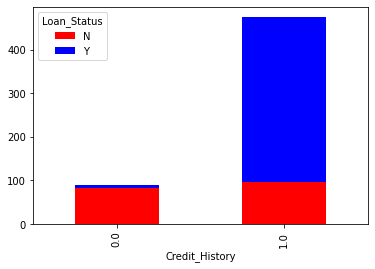

In [12]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'],grid=False)

In [13]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [15]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
df['Self_Employed'].fillna('No',inplace=True)

# Correlation between all the numerical variables
HeatMap representation of the correlation

<AxesSubplot:>

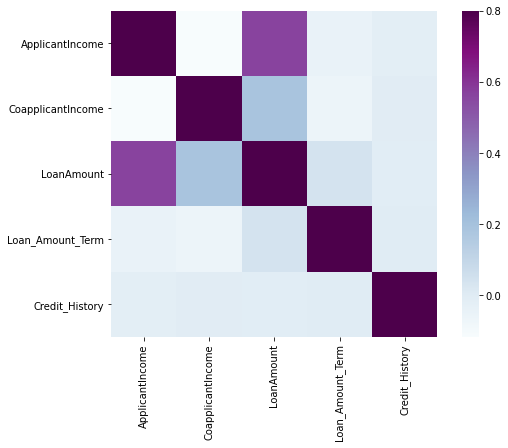

In [17]:
matrix=df.corr()
f,ax= plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Replacing the categorical values

In [20]:
#converting string values(Categorical Values) to integer
df.Gender=df.Gender.map({"Female":0,"Male":1})
df.Married=df.Married.map({"No":0,"Yes":1})
df.Self_Employed=df.Self_Employed.map({"No":0,"Yes":1})
df.Education=df.Education.map({"Not":1,"Graduate":0})
df.Property_Area=df.Property_Area.map({"Urban":0,"Rural":1})
df.Loan_Status=df.Loan_Status.map({"N":0,"Y":1})
df.Dependents=df.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0,5849,0.0,146.412162,360.0,1.0,0.0,1
1,LP001003,1.0,1.0,1.0,0.0,0,4583,1508.0,128.000000,360.0,1.0,1.0,0
2,LP001005,1.0,1.0,0.0,0.0,1,3000,0.0,66.000000,360.0,1.0,0.0,1
3,LP001006,1.0,1.0,0.0,NaN,0,2583,2358.0,120.000000,360.0,1.0,0.0,1
4,LP001008,1.0,0.0,0.0,0.0,0,6000,0.0,141.000000,360.0,1.0,0.0,1


In [22]:
#converting string values(Categorical Values) to integer
df1.Gender=df1.Gender.map({"Female":0,"Male":1})
df1.Married=df1.Married.map({"No":0,"Yes":1})
df1.Self_Employed=df1.Self_Employed.map({"No":0,"Yes":1})
df1.Education=df1.Education.map({"Not":1,"Graduate":0})
df1.Property_Area=df1.Property_Area.map({"Urban":0,"Rural":1})
df1.Dependents=df1.Dependents.map({"3+":3,"0":0,"1":1,"2":2})



In [23]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,0.0,0.0,5720,0,110.0,360.0,1.0,0.0
1,LP001022,1.0,1,1.0,0.0,0.0,3076,1500,126.0,360.0,1.0,0.0
2,LP001031,1.0,1,2.0,0.0,0.0,5000,1800,208.0,360.0,1.0,0.0
3,LP001035,1.0,1,2.0,0.0,0.0,2340,2546,100.0,360.0,NaN,0.0
4,LP001051,1.0,0,0.0,NaN,0.0,3276,0,78.0,360.0,1.0,0.0


# Filling Missing Values

In [24]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Education"].fillna(df["Education"].mode()[0],inplace=True)
df["Property_Area"].fillna(df["Property_Area"].mode()[0],inplace=True)

In [25]:
#Find the missing values in Loan Amount Term to fill
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [26]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)

In [27]:
#Filling the Null values using the Median in LoanAmount
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [28]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Filling Missing Values in Test Data

In [29]:
df1.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education             84
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area        116
dtype: int64

In [30]:
df1["Gender"].fillna(df1["Gender"].mode()[0],inplace=True)
df1["Married"].fillna(df1["Married"].mode()[0],inplace=True)
df1["Dependents"].fillna(df1["Dependents"].mode()[0],inplace=True)
df1["Self_Employed"].fillna(df1["Self_Employed"].mode()[0],inplace=True)
df1["Credit_History"].fillna(df1["Credit_History"].mode()[0],inplace=True)
df1["Education"].fillna(df1["Education"].mode()[0],inplace=True)
df1["Property_Area"].fillna(df1["Property_Area"].mode()[0],inplace=True)

In [31]:
#Find the missing values in Loan Amount Term to fill
df1["Loan_Amount_Term"].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
350.0      1
12.0       1
36.0       1
120.0      1
60.0       1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [32]:
df1["Loan_Amount_Term"].fillna(df1["Loan_Amount_Term"].mode()[0],inplace=True)

In [33]:
#Filling the Null values using the Median in LoanAmount
df1["LoanAmount"].fillna(df1["LoanAmount"].median(),inplace=True)

In [34]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# FEATURE ENGINEERING

In [35]:
df['Total_Income']=df["ApplicantIncome"]+df['CoapplicantIncome']
df1['Total_Income']=df1["ApplicantIncome"]+df1['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

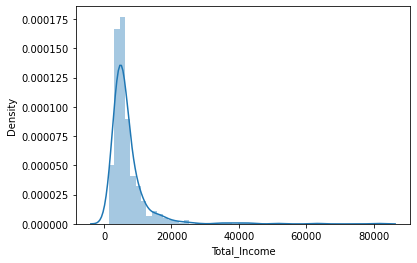

In [36]:
sns.distplot(df["Total_Income"])

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

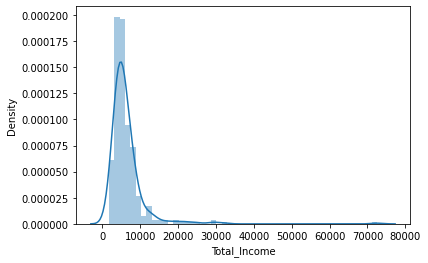

In [37]:
sns.distplot(df1["Total_Income"])

In [38]:
df['Total_Income_log']=np.log(df["Total_Income"])
df1['Total_Income_log']=np.log(df1["Total_Income"])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

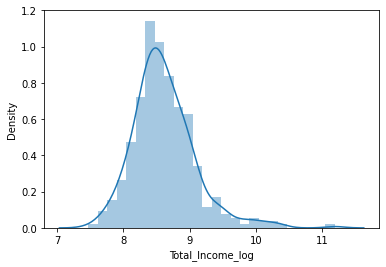

In [39]:
sns.distplot(df1["Total_Income_log"])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

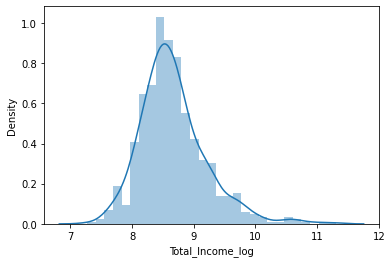

In [40]:
sns.distplot(df["Total_Income_log"])

In [41]:
df['EMI']=df["LoanAmount"]/df['Loan_Amount_Term']
df1['EMI']=df1["LoanAmount"]/df1['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

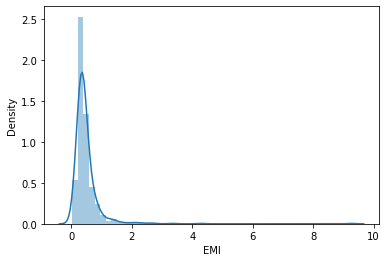

In [42]:
sns.distplot(df["EMI"])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

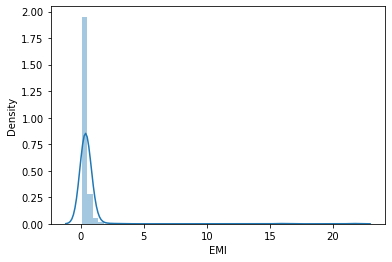

In [43]:
sns.distplot(df1["EMI"])

In [44]:
#Multiplying by 1000 to make the units equal 
df['Balance Income']=df["Total_Income"]-(df['EMI']*1000)
df1['Balance Income']=df1["Total_Income"]-(df1['EMI']*1000)

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

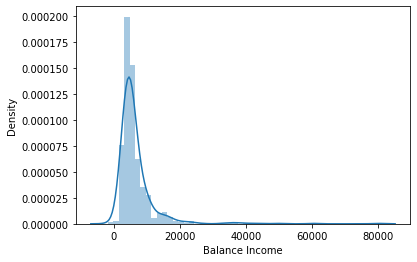

In [45]:
sns.distplot(df["Balance Income"])

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

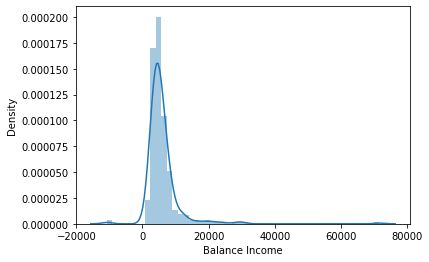

In [46]:
sns.distplot(df1["Balance Income"])

# Dropping The variables

In [47]:
df=df.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [48]:
df1=df1.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [49]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,0.0,0.0,0.0,0,1.0,0.0,1,5849.0,8.674026,0.406700,5442.299550
1,1.0,1.0,1.0,0.0,0,1.0,1.0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1.0,0.0,0.0,1,1.0,0.0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1.0,0.0,0.0,0,1.0,0.0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,0.0,0.0,0.0,0,1.0,0.0,1,6000.0,8.699515,0.391667,5608.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0,1.0,1.0,1,2900.0,7.972466,0.197222,2702.777778
610,1.0,1.0,3.0,0.0,0,1.0,1.0,1,4106.0,8.320205,0.222222,3883.777778
611,1.0,1.0,1.0,0.0,0,1.0,0.0,1,8312.0,9.025456,0.702778,7609.222222
612,1.0,1.0,2.0,0.0,0,1.0,0.0,1,7583.0,8.933664,0.519444,7063.555556


In [50]:
df1=df1.drop("Loan_ID",axis=1)

In [51]:
df1

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,0.0,0.0,0.0,1.0,0.0,5720,8.651724,0.305556,5414.444444
1,1.0,1,1.0,0.0,0.0,1.0,0.0,4576,8.428581,0.350000,4226.000000
2,1.0,1,2.0,0.0,0.0,1.0,0.0,6800,8.824678,0.577778,6222.222222
3,1.0,1,2.0,0.0,0.0,1.0,0.0,4886,8.494129,0.277778,4608.222222
4,1.0,0,0.0,0.0,0.0,1.0,0.0,3276,8.094378,0.216667,3059.333333
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3.0,0.0,1.0,1.0,0.0,5786,8.663196,0.313889,5472.111111
363,1.0,1,0.0,0.0,0.0,1.0,0.0,4867,8.490233,0.319444,4547.555556
364,1.0,0,0.0,0.0,0.0,1.0,0.0,5243,8.564649,0.350000,4893.000000
365,1.0,1,0.0,0.0,0.0,1.0,1.0,7393,8.908289,0.438889,6954.111111


In [52]:
df.dtypes

Gender              float64
Married             float64
Dependents          float64
Education           float64
Self_Employed         int64
Credit_History      float64
Property_Area       float64
Loan_Status           int64
Total_Income        float64
Total_Income_log    float64
EMI                 float64
Balance Income      float64
dtype: object

In [53]:
df1.dtypes

Gender              float64
Married               int64
Dependents          float64
Education           float64
Self_Employed       float64
Credit_History      float64
Property_Area       float64
Total_Income          int64
Total_Income_log    float64
EMI                 float64
Balance Income      float64
dtype: object

# Logistic Regression

In [54]:
from sklearn. model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

from sklearn. model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


In [55]:
#Lets Prepare the data for feeding in to the models
#Save the target variable in seperate
X=df.drop("Loan_Status",1)
y=df.Loan_Status

In [56]:
#Logistic Regression

X=pd.get_dummies(X)
df=pd.get_dummies(df)


In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [58]:
model=LogisticRegression(C=1.0,n_jobs=1,random_state=1,solver="liblinear")
model.fit(x_train,y_train)


LogisticRegression(n_jobs=1, random_state=1, solver='liblinear')

In [59]:
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
jac=jaccard_score(y_test,y_pred)
f=f1_score(y_test,y_pred)
log=log_loss(y_test,y_pred)

In [60]:
metrics = {
  "accuracy_score": acc,
  "jaccard_score": jac,
  "f1_score": f,
    "log_loss":log
}
print(metrics)

{'accuracy_score': 0.7837837837837838, 'jaccard_score': 0.7530864197530864, 'f1_score': 0.8591549295774648, 'log_loss': 7.468012108628136}


# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [62]:
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
jac=jaccard_score(y_test,y_pred)
f=f1_score(y_test,y_pred)
log=log_loss(y_test,y_pred)

In [63]:
metrics = {
  "accuracy_score": acc,
  "jaccard_score": jac,
  "f1_score": f,
    "log_loss":log
}
print(metrics)

{'accuracy_score': 0.6594594594594595, 'jaccard_score': 0.6227544910179641, 'f1_score': 0.7675276752767528, 'log_loss': 11.762043757655684}


Minimum error:- 0.31891891891891894 at K = 20


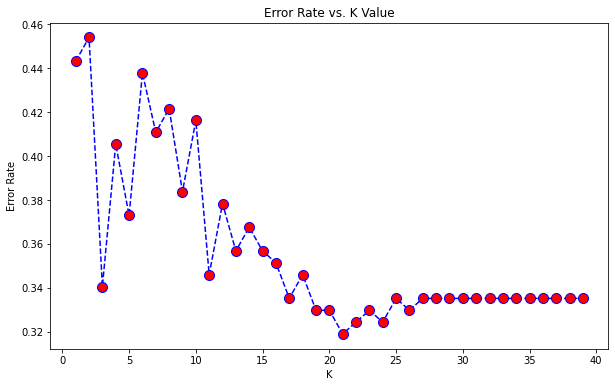

In [64]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [65]:
model=KNeighborsClassifier(n_neighbors=20)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
jac=jaccard_score(y_test,y_pred)
f=f1_score(y_test,y_pred)
log=log_loss(y_test,y_pred)

In [66]:
metrics = {
  "accuracy_score": acc,
  "jaccard_score": jac,
  "f1_score": f,
    "log_loss":log
}
print(metrics)

{'accuracy_score': 0.6702702702702703, 'jaccard_score': 0.6648351648351648, 'f1_score': 0.7986798679867988, 'log_loss': 11.388716412637478}


# DecisionTreeClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [68]:
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
jac=jaccard_score(y_test,y_pred)
f=f1_score(y_test,y_pred)
log=log_loss(y_test,y_pred)

In [69]:
metrics = {
  "accuracy_score": acc,
  "jaccard_score": jac,
  "f1_score": f,
    "log_loss":log
}
print(metrics)

{'accuracy_score': 0.6702702702702703, 'jaccard_score': 0.6038961038961039, 'f1_score': 0.7530364372469637, 'log_loss': 11.388595392485879}


# svm

In [70]:
from sklearn import svm
model=svm.SVC()
model.fit(x_train,y_train)

SVC()

In [71]:
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
jac=jaccard_score(y_test,y_pred)
f=f1_score(y_test,y_pred)
log=log_loss(y_test,y_pred)

In [72]:
metrics = {
  "accuracy_score": acc,
  "jaccard_score": jac,
  "f1_score": f,
    "log_loss":log
}
print(metrics)

{'accuracy_score': 0.654054054054054, 'jaccard_score': 0.654054054054054, 'f1_score': 0.7908496732026143, 'log_loss': 11.948817644945708}
